# Time Series Project

### The main goal of this project is to improve analysis and model building skills. The ideia is to go down deep the chosen tools, uderstanding the reasons to use certain kind of graph or model.

### > Additional Notes
- Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.

- A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

### Part I: Exploring the data

--------------

##### 0. Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

##### 1. Data Acquisition

In [8]:
current_folder = os.getcwd()
os.listdir(current_folder + '/data')

['holidays_events.csv',
 'oil.csv',
 'sample_submission.csv',
 'stores.csv',
 'test.csv',
 'train.csv',
 'transactions.csv']

In [13]:
holidays_dataset = pd.read_csv(current_folder + '/data/holidays_events.csv')
oil_dataset = pd.read_csv(current_folder + '/data/oil.csv')
stores_dataset = pd.read_csv(current_folder + '/data/stores.csv')
train_dataset = pd.read_csv(current_folder + '/data/train.csv')
test_dataset = pd.read_csv(current_folder + '/data/test.csv')
transaction_dataset = pd.read_csv(current_folder + '/data/transactions.csv')

###### 1.1 Holidays dataset

In [18]:
holidays_dataset
# Dataset which contains all the Ecuador holidays. They can be Local, Regional or National
# Besides, there is a column named transferred, which indicate if a holiday was transfered to another day by the government.
## In this case, the correspondent holiday is more like a normal day. To se where the transferred holiday was moved, it is necessary
## to see the column type, writed 'transfer'
# Another particularity, type "Bridge" is also considered as holiday (extended break). This day needs a payback, a day with type 
## "Work Day"

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [26]:
holidays_dataset.groupby('locale')['date'].count()

locale
Local       152
National    174
Regional     24
Name: date, dtype: int64

In [30]:
holidays_dataset.groupby('transferred')['date'].count()

transferred
False    338
True      12
Name: date, dtype: int64

In [29]:
holidays_dataset.groupby(['type','locale','locale_name'])['date'].count()

type        locale    locale_name                   
Additional  Local     Guayaquil                          5
                      Quito                              6
            National  Ecuador                           40
Bridge      National  Ecuador                            5
Event       National  Ecuador                           56
Holiday     Local     Ambato                            12
                      Cayambe                            6
                      Cuenca                             6
                      El Carmen                          6
                      Esmeraldas                         6
                      Guaranda                          12
                      Guayaquil                          5
                      Ibarra                             6
                      Latacunga                         12
                      Libertad                           6
                      Loja                               6
   

###### 1.2 Oil dataset

In [32]:
oil_dataset
# Daily oil price. Includes values during both the train and test data timeframes. 
## (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [36]:
oil_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
dcoilwtico,1175.0,67.714366,25.630476,26.19,46.405,53.19,95.66,110.62


array([[<AxesSubplot:title={'center':'dcoilwtico'}>]], dtype=object)

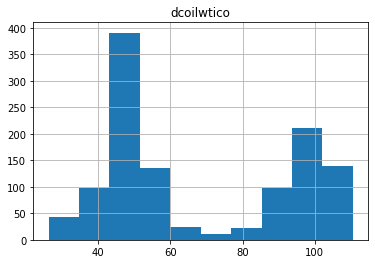

In [38]:
oil_dataset.hist()
# graphically, whe can see the 2nd percentil (median). On the other hand, the second bigger bucket is around 100, showing that
## the price is volatile

###### 1.3. Stores dataset

In [33]:
stores_dataset
# cluster groups stores wiht similar characteristics

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [41]:
stores_dataset.groupby(['type'])['store_nbr'].count()

type
A     9
B     8
C    15
D    18
E     4
Name: store_nbr, dtype: int64

<AxesSubplot:xlabel='cluster'>

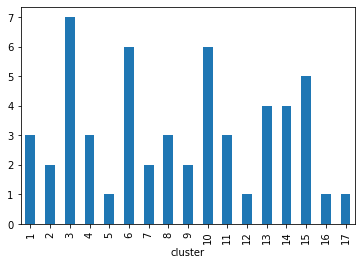

In [44]:
stores_dataset.groupby(['cluster'])['store_nbr'].count().plot(kind='bar')

<AxesSubplot:ylabel='state'>

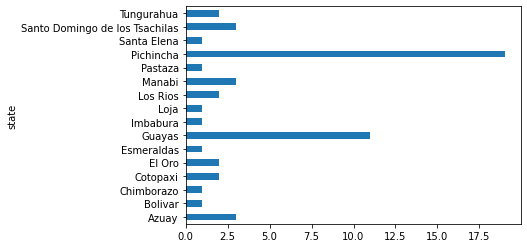

In [47]:
stores_dataset.groupby(['state'])['store_nbr'].count().plot(kind='barh')

<AxesSubplot:ylabel='city'>

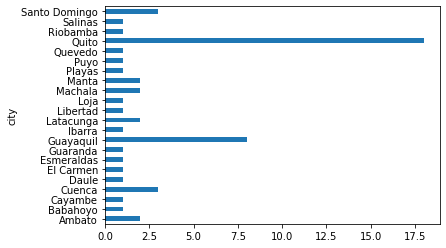

In [48]:
stores_dataset.groupby(['city'])['store_nbr'].count().plot(kind='barh')

###### 1.4. Transaction dataset

In [50]:
transaction_dataset
# connects stores with transactions amount per day

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


<AxesSubplot:xlabel='store_nbr'>

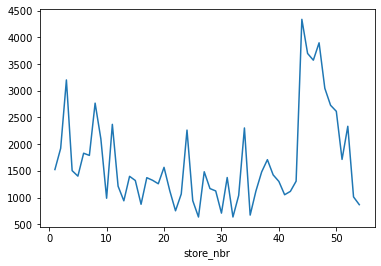

In [55]:
transaction_dataset.groupby('store_nbr')['transactions'].mean().plot()
# Stores between 40 and 50 are the top sellers

##### 1.5. Train dataset

In [56]:
train_dataset
#The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
# store_nbr: identifies the store at which the products are sold.
# family: identifies the type of product sold.
# sales: gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
# onpromotion: gives the total number of items in a product family that were being promoted at a store at a given date.

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


<AxesSubplot:xlabel='family'>

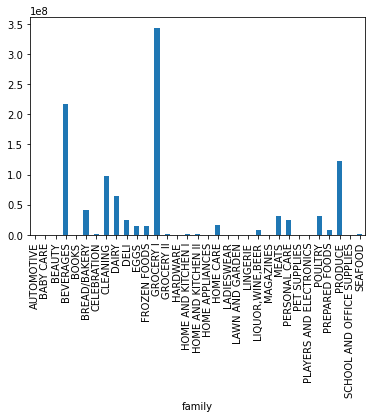

In [65]:
train_dataset.groupby(['family'])['sales'].sum().plot(kind='bar')

##### 2. Hypothesis

- Sales are higher in holidays than in weekdays
- Bridge days count with more sales than weekends
- Sales decrease when the oil price grows up
- Quito and Guyaquil represent the major revenue
- The best stores are located or in Quito or in Guyaquil
- The more promotions, The greater is the sales 